In [1]:
%load_ext autoreload
%autoreload 2
import json
import os
import re
import sys
from datetime import date, datetime
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import requests

cwd = Path.cwd()
home = Path.home()
module_path = f"{home}/serhi/src/lib" if cwd == home else f"{cwd.parents[1]}/lib"
sys.path.append(module_path)
import serhi

SerHi Tools


In [2]:
# inicio
# cambiar como corresponda

ENTITY = 'ibex'
NB_NAME = 'ibex_indice_general'
serhi.initialize(ENTITY, NB_NAME)

serhi.CWD /home/runner/work/serhi/serhi/src/entidades/ibex
serhi.HOME /home/runner
serhi.BASE_PATH /home/runner/work/serhi/serhi
serhi.DATA_PATH /home/runner/work/serhi/serhi/data/process/ibex/
serhi.DOWN_PATH /home/runner/work/serhi/serhi/tmp/download/ibex/
serhi.OUT_FILE /home/runner/work/serhi/serhi/data/process/ibex/ibex_indice_general.csv


In [3]:
# https://query1.finance.yahoo.com/v7/finance/download/%5EIBEX?period1=742435200&period2=1665532800&interval=1d&events=history&includeAdjustedClose=true

[Yahoo finance IBEX 35 CSV data](https://finance.yahoo.com/quote/%5EIBEX/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAHnEaXnMsiP9WJf78bIbzc9ohZyhIzfcaW8E8mpiQSvjlI3DQzQekLPikksoomq2KaEmox1X_UEXP4VGCK-XcnhAhIpS-89bAt3gv8kCRYm81ezJbqWGzapPKZ9lTsL2zJjqPXFFVf3Xy581hbE8aUYT5k8OLOZEafKDKzMoUp0-)

In [4]:
start = int(datetime(1993,1,1).timestamp())
print(start)
start = 742435200
end = int(datetime.now().timestamp())
print(start,end)

725846400
742435200 1679042989


In [5]:
# descragamos el archivo a procesar - siempre en DOWN_PATH
# ?period1=1633781432&period2=1665317432&interval=1d&events=history&includeAdjustedClose=true
def download_file(url, params):
    headers = {
        'Accept-Language': 'es-ES,es',
        'Accept': 'text/csv;charset=utf-8',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36',
    }   
    r = requests.get(url, params, headers=headers)
    print(f'Downloading {r.url}')
    open(serhi.DOWN_PATH + 'data.csv', 'wb').write(r.content)

url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EIBEX'

download_file(url, params = {
                'period1': start,
                'period2': end,
                'interval': '1d',
                'events': 'history',
                #'includedAdjustedClose': 'true'
            })

In [6]:
# a ver que tenemos
df = pd.read_csv(serhi.DOWN_PATH + 'data.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0.0
1,1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0.0
2,1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0.0
3,1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0.0
4,1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0.0


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0.0
1,1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0.0
2,1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0.0
3,1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0.0
4,1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0.0


In [8]:
df = df.set_index(pd.DatetimeIndex(df['Date']))

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7656 entries, 1993-07-12 to 2023-03-17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7656 non-null   datetime64[ns]
 1   Open       7517 non-null   float64       
 2   High       7517 non-null   float64       
 3   Low        7517 non-null   float64       
 4   Close      7517 non-null   float64       
 5   Adj Close  7517 non-null   float64       
 6   Volume     7517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 478.5 KB


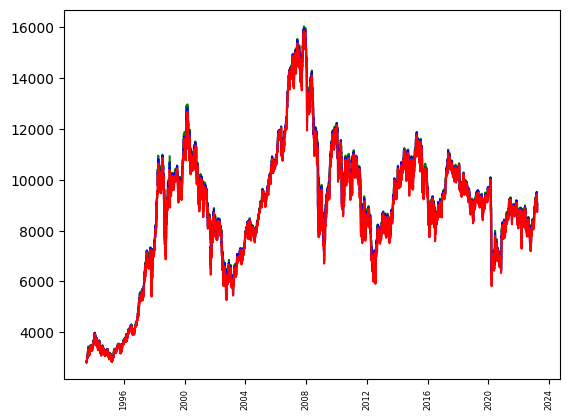

In [10]:
# show data
#plt.figure(figsize=(20, 5), dpi=100)
plt.xticks(fontsize=6, rotation=90)
plt.plot(df['Date'],df['High'],'g'); 
plt.plot(df['Date'],df['Close'],'b');
plt.plot(df['Date'],df['Low'],'r');  
plt.show()

In [11]:
df.drop(['Open', 'Adj Close'], axis=1, inplace=True)
df.head()


,Date,High,Low,Close,Volume
Date,,,,,
1993-07-12,1993-07-12,2826.800049,2814.600098,2826.399902,0.0
1993-07-13,1993-07-13,2843.699951,2820.899902,2843.399902,0.0
1993-07-14,1993-07-14,2858.399902,2845.399902,2851.100098,0.0
1993-07-15,1993-07-15,2848.699951,2835.000000,2843.699951,0.0
1993-07-16,1993-07-16,2848.000000,2818.800049,2830.500000,0.0


In [12]:
df['Ud'] = 'idx'
df['Set'] = ENTITY
# save dataset with month values
df.to_csv(serhi.OUT_FILE,index=False)

In [13]:
### MES

In [14]:
# create a new dataframe only with the end of month
dm = df.groupby([df['Date'].dt.year, df['Date'].dt.month], as_index=False).last()

# to get the higer an lower month value 
def get_high_low(date,min):    
    mask = (df['Date'].dt.year == date.year) & (df['Date'].dt.month == date.month)
    value = df.loc[mask]['Low'].min() if min else df.loc[mask]['High'].max()
    return value

dm['Low'] = dm['Date'].apply(lambda x: get_high_low(x,True))
dm['High'] = dm['Date'].apply(lambda x: get_high_low(x,False))

In [15]:
dm.head()

,Date,High,Low,Close,Volume,Ud,Set
0,1993-07-30,3044.500000,2814.100098,2981.199951,0.0,idx,ibex
1,1993-08-31,3436.800049,2970.399902,3360.199951,0.0,idx,ibex
2,1993-09-30,3336.800049,3073.699951,3177.300049,0.0,idx,ibex
3,1993-10-29,3482.699951,3157.399902,3449.600098,0.0,idx,ibex
4,1993-11-30,3477.899902,3262.899902,3280.100098,0.0,idx,ibex


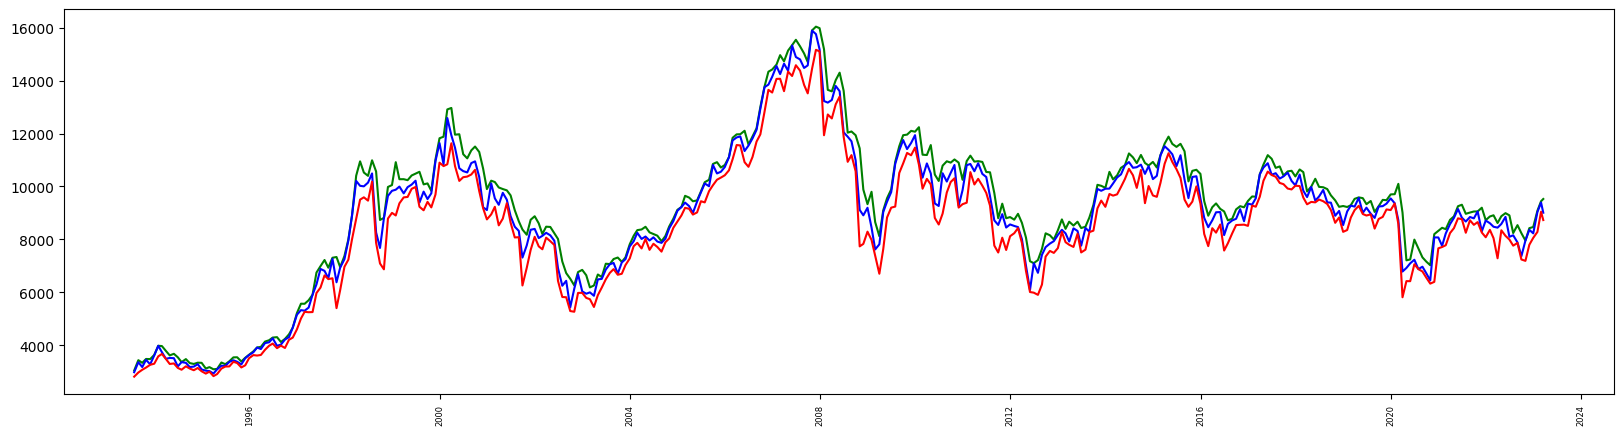

In [16]:
plt.figure(figsize=(20, 5), dpi=100)
plt.xticks(fontsize=6, rotation=90)
plt.plot(dm['Date'],dm['High'],'g'); 
plt.plot(dm['Date'],dm['Close'],'b'); 
plt.plot(dm['Date'],dm['Low'],'r'); 
plt.show()

In [17]:
# guardamos otro mensual
ENTITY = 'ibex'
NB_NAME = 'ibex_indice_general_m'
serhi.initialize(ENTITY, NB_NAME)

dm['Ud'] = 'idx'
dm['Set'] = ENTITY
# save dataset with month values
dm.to_csv(serhi.OUT_FILE,index=False)

serhi.CWD /home/runner/work/serhi/serhi/src/entidades/ibex
serhi.HOME /home/runner
serhi.BASE_PATH /home/runner/work/serhi/serhi
serhi.DATA_PATH /home/runner/work/serhi/serhi/data/process/ibex/
serhi.DOWN_PATH /home/runner/work/serhi/serhi/tmp/download/ibex/
serhi.OUT_FILE /home/runner/work/serhi/serhi/data/process/ibex/ibex_indice_general_m.csv
